In [46]:
import numpy
import matplotlib
%matplotlib inline
import scipy.special

In [47]:
class neuralNetwork:
    
    def __init__(self,inputnodes,hiddennodes, outputnodes, learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-.5), (self.hnodes, self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-.5), (self.onodes, self.hnodes))
        self.activation_function= lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass
 
    def train(self, inputs_list, targets_list):
        #converts input list to 2d array
        inputs=numpy.array(inputs_list, ndmin=2).T
        
        targets =numpy.array(targets_list,ndmin=2).T
        
        #calc signals input into hidden layer
        hidden_inputs=numpy.dot(self.wih, inputs)
        
        # activate hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        
        
        #calc final outputs
        final_inputs =numpy.dot(self.who, hidden_outputs)
        
        # activate final output
        final_outputs=self.activation_function(final_inputs)
        
        #error
        output_errors=targets -final_outputs
        
        #hidden errors
        hidden_errors= numpy.dot(self.who.T, output_errors)
        
        #calc the who
        self.who += self.lr * numpy.dot((output_errors * final_outputs* (1.0- final_outputs)),numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs* (1.0- hidden_outputs)),numpy.transpose(inputs))
        
        pass
    
    def query(self, input_lists):
        #converts input list to 2d array
        inputs=numpy.array(input_lists, ndmin=2).T
        
        #calc signals input into hidden layer
        hidden_inputs=numpy.dot(self.wih, inputs)
        
        # activate hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        
        
        #calc final outputs
        final_inputs =numpy.dot(self.who, hidden_outputs)
        
        # activate final output
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
    def backquery(self, targets_list):
        final_outputs=numpy.array(targets, ndmin=2).T
        
        final_inputs =self.activation_function(final_outputs)
        
        hidden_outputs=numpy.dot(self.who.T,final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
                # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
    


In [62]:
training_data_file=open("mnist_dataset/mnist_train.csv","r")
training_data_list=training_data_file.readlines()
training_data_file.close()

input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=.22
total_images_to_process=len(training_data_list)
print("The number of rows is : ",total_images_to_process)

n=neuralNetwork(input_nodes,hidden_nodes, output_nodes, learning_rate)
epochs=100
counter=1
for e in range(epochs):
    for record in training_data_list:
        
        all_values=record.split(',')
        inputs =(numpy.asfarray(all_values[1:]) /255 * .99 ) + .01
        targets=numpy.zeros(output_nodes) + .01
        targets[int(all_values[0])]=.99
        n.train(inputs, targets)
        if (counter % (total_images_to_process/3)) ==0:
            print("Epoch #:", e + 1)
            print('Now on #:',counter)
        
        if (counter ==total_images_to_process):
            print('Finished with epoch:',e)
            counter=1;
        counter =counter + 1



The number of rows is :  60000
Epoch #: 1
Now on #: 20000
Epoch #: 1
Now on #: 40000
Epoch #: 1
Now on #: 60000
Finished with epoch: 0
Epoch #: 2
Now on #: 20000
Epoch #: 2
Now on #: 40000
Epoch #: 2
Now on #: 60000
Finished with epoch: 1
Epoch #: 3
Now on #: 20000
Epoch #: 3
Now on #: 40000
Epoch #: 3
Now on #: 60000
Finished with epoch: 2
Epoch #: 4
Now on #: 20000
Epoch #: 4
Now on #: 40000
Epoch #: 4
Now on #: 60000
Finished with epoch: 3
Epoch #: 5
Now on #: 20000
Epoch #: 5
Now on #: 40000
Epoch #: 5
Now on #: 60000
Finished with epoch: 4
Epoch #: 6
Now on #: 20000
Epoch #: 6
Now on #: 40000
Epoch #: 6
Now on #: 60000
Finished with epoch: 5
Epoch #: 7
Now on #: 20000
Epoch #: 7
Now on #: 40000
Epoch #: 7
Now on #: 60000
Finished with epoch: 6
Epoch #: 8
Now on #: 20000
Epoch #: 8
Now on #: 40000
Epoch #: 8
Now on #: 60000
Finished with epoch: 7
Epoch #: 9
Now on #: 20000
Epoch #: 9
Now on #: 40000
Epoch #: 9
Now on #: 60000
Finished with epoch: 8
Epoch #: 10
Now on #: 20000
Epoch

In [67]:
test_data_file =open("mnist_dataset/mnist_test.csv","r")
test_data_list=test_data_file.readlines()
test_data_file.close()

In [68]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    #print(correct_label,"correct label")
    inputs =(numpy.asfarray(all_values[1:])/255 *.99) + .01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    #print(label,"networks answer")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
scorecard_array=numpy.array(scorecard)
print('training set size', len(training_data_list))
print('hidden layers',hidden_nodes)
print('learning rate', learning_rate)
print('epochs',epochs)
print("permformance =",scorecard_array.sum()/scorecard_array.size)

training set size 60000
hidden layers 100
learning rate 0.22
epochs 100
permformance = 0.9424


Showing 0
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 1
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 2
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 3
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 4
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 5
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 6
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 7
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 8
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]
Showing 9
[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]


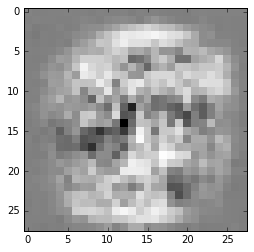

In [69]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
for l in range(10):
    print('Showing', l)
    # create the output signals for this label
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[4] = 0.99
    print(targets)

    # get image data
    image_data = n.backquery(targets)

    # plot image data
    matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')